In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np 
from torchvision.datasets import MNIST
from scipy.spatial.distance import cdist
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [4]:
with open('../data/Bio_data/Gevers2014/Gevers2014_meta.txt', 'r') as file:
    meta = file.read()

# Split the contents into lines
meta_lines = meta.split('\n')

# Remove empty lines and strip whitespace
meta_lines = [line.strip() for line in meta_lines if line.strip()]

# Split each line by tabs to create columns
meta_data = [line.split('\t') for line in meta_lines]

# Create a pandas DataFrame from the list of lists
meta_df = pd.DataFrame(meta_data)

# Count the number of rows and columns
num_rows, num_columns = meta_df.shape

# Print the counts
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Display the first few rows of the DataFrame for inspection
print(meta_df.head())

csv_file_path = '../data/Bio_data/Gevers2014/Gevers2014_meta.csv'

# Save the DataFrame as a CSV file
meta_df.to_csv(csv_file_path, index=False,header=0)

# Print a message to confirm that the file has been saved
print(f"DataFrame saved as {csv_file_path}")



Number of rows: 1360
Number of columns: 70
                   0                1                     2   \
0           #SampleID  BarcodeSequence  LinkerPrimerSequence   
1  SKBTI.1325.1246591             None   GTGCCAGCMGCCGCGGTAA   
2      121283.1246600             None   GTGCCAGCMGCCGCGGTAA   
3  SKBTI.0870.1246169             None   GTGCCAGCMGCCGCGGTAA   
4  SKBTI.1178.1246304             None   GTGCCAGCMGCCGCGGTAA   

                   3                  4                  5          6   \
0  TARGET_SUBFRAGMENT  ASSIGNED_FROM_GEO  EXPERIMENT_CENTER      TITLE   
1                  V4                  n                 BI  CCFA_RISK   
2                  V4                  n                 BI  CCFA_RISK   
3                  V4                  n                 BI  CCFA_RISK   
4                  V4                  n                 BI  CCFA_RISK   

                      7            8           9   ...                 60  \
0             RUN_PREFIX          AGE  MESALAMINE 

In [5]:
with open('../data/Bio_data/Gevers2014/otutable.txt', 'r') as file:
    OTU = file.read()

# Split the contents into lines
OTU_lines = OTU.split('\n')

# Remove empty lines and strip whitespace
OTU_lines = [line.strip() for line in OTU_lines if line.strip()]

# Split each line by tabs to create columns
OTU_data = [line.split('\t') for line in OTU_lines]

# Create a pandas DataFrame from the list of lists
OTU_df = pd.DataFrame(OTU_data)

# Count the number of rows and columns
num_rows, num_columns = OTU_df.shape

# Print the counts
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Display the first few rows of the DataFrame for inspection
print(OTU_df.head())
csv_file_path = '../data/Bio_data/Gevers2014/Gevers2014_OTU.csv'

# Save the DataFrame as a CSV file
OTU_df.to_csv(csv_file_path, index=False,header=0)

# Print a message to confirm that the file has been saved
print(f"DataFrame saved as {csv_file_path}")

Number of rows: 944
Number of columns: 1359
                                                0               1     \
0                                            #OTU ID  100052.1246453   
1  NR_112946.1_Bacteroides_vulgatus_strain_JCM_58...            1373   
2  NR_041351.1_Bacteroides_dorei_strain_175_16S_r...              17   
3  NR_041342.1_Parabacteroides_distasonis_strain_...               0   
4  NR_025930.1_Ruminococcus_bromii_strain_ATCC_27...               0   

             2               3               4               5     \
0  100216.1246217  100211.1246832  100083.1246311  100095.1246168   
1            2669               0             311               1   
2            1993               1             165             623   
3             814               0               0              34   
4               0               1               0               0   

             6               7               8               9     ...  \
0  100043.1246460  100212.1247085 

In [106]:
# Define the path to the CSV file
csv_file_path = '../data/Bio_data/Gevers2014/Gevers2014_meta.csv'
csv_file_path2 = '../data/Bio_data/Gevers2014/Gevers2014_OTU.csv'

# Read the CSV file into a DataFrame
meta_df = pd.read_csv(csv_file_path)
OTU_df = pd.read_csv(csv_file_path2)
#OTU_df= OTU_df.T


In [114]:
data = OTU_df.T.iloc[1:].reset_index(drop=True)
data = data.astype(int)
data

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1373,17,0,0,68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2669,1993,814,0,122,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,311,165,0,0,1,57,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,623,34,0,102,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Step 1: Remove the IDs from the first row
column_ids = OTU_df.iloc[0]
OTU_df = OTU_df.iloc[1:]

# Step 2: Transpose the DataFrame
OTU_df = OTU_df.T

# Step 3: Add the IDs as the first column in the transposed DataFrame
OTU_df.insert(0, 'ID', column_ids)
OTU_df.reset_index(inplace=True)
OTU_df

,index,ID,1,2,3,4,5,6,7,8,...,933,934,935,936,937,938,939,940,941,942
0,#OTU ID,NR_112946.1_Bacteroides_vulgatus_strain_JCM_58...,NR_041351.1_Bacteroides_dorei_strain_175_16S_r...,NR_041342.1_Parabacteroides_distasonis_strain_...,NR_025930.1_Ruminococcus_bromii_strain_ATCC_27...,NR_025651.1_{Clostridium}_lactatifermentans_st...,NR_024750.1_Coprococcus_catus_strain_VPI-C6-61...,NR_024661.1_Eubacterium_ruminantium_strain_GA1...,NR_024641.1_Pluralibacter_gergoviae_strain_JCM...,NG_042882.1_Helicobacter_mastomyrinus_strain_M...,...,NR_147380.1_Eggerthella_timonensis_strain_Mars...,NR_147392.1_Anaerococcus_mediterraneensis_stra...,NR_147401.1_Sutterella_massiliensis_strain_Mar...,NR_147398.1_Anaerotruncus_rubiinfantis_strain_...,NR_147402.1_Sutturella_timonensis_strain_Marse...,NR_147406.1_Mordavella_massiliensis_strain_Mar...,NR_147712.1_Massilia_putida_strain_6NM-7_16S_r...,NR_147709.1_Lactobacillus_wasatchensis_strain_...,NR_148266.1_Clostridium_vulturis_strain_YMB-57...,NR_147761.1_Bifidobacterium_tissieri_strain_MR...
1,100052.1246453,1373,17,0,0,68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100216.1246217,2669,1993,814,0,122,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100211.1246832,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100083.1246311,311,165,0,0,1,57,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,SKBTI.0914.1246971,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1355,SKBTI.0448.1246164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1356,SKBTI.0939.1246784,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1357,SKBTI.0692.1246233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
OTU_df["index"]

0                  #OTU ID
1           100052.1246453
2           100216.1246217
3           100211.1246832
4           100083.1246311
               ...        
1354    SKBTI.0914.1246971
1355    SKBTI.0448.1246164
1356    SKBTI.0939.1246784
1357    SKBTI.0692.1246233
1358    SKBTI.0362.1246358
Name: index, Length: 1359, dtype: object

In [8]:
# Read the CSV file into a DataFrame
meta_df = pd.read_csv(csv_file_path)

# Use value_counts() to count unique values in the 'TARGET_SUBFRAGMENT' column
value_counts = meta_df['TARGET_SUBFRAGMENT'].value_counts()

# Display the unique values and their counts
print(value_counts)

V4    1359
Name: TARGET_SUBFRAGMENT, dtype: int64


In [9]:
# Read the CSV file into a DataFrame
meta_df = pd.read_csv(csv_file_path)

# Use value_counts() to count unique values in the 'TARGET_SUBFRAGMENT' column
value_counts = meta_df['GASTROINTEST_DISORD'].value_counts()

# Display the unique values and their counts
print(value_counts)

CD    731
no    336
UC    219
IC     73
Name: GASTROINTEST_DISORD, dtype: int64


In [72]:

OTU_df

,index,ID,1,2,3,4,5,6,7,8,...,933,934,935,936,937,938,939,940,941,942
0,#OTU ID,NR_112946.1_Bacteroides_vulgatus_strain_JCM_58...,NR_041351.1_Bacteroides_dorei_strain_175_16S_r...,NR_041342.1_Parabacteroides_distasonis_strain_...,NR_025930.1_Ruminococcus_bromii_strain_ATCC_27...,NR_025651.1_{Clostridium}_lactatifermentans_st...,NR_024750.1_Coprococcus_catus_strain_VPI-C6-61...,NR_024661.1_Eubacterium_ruminantium_strain_GA1...,NR_024641.1_Pluralibacter_gergoviae_strain_JCM...,NG_042882.1_Helicobacter_mastomyrinus_strain_M...,...,NR_147380.1_Eggerthella_timonensis_strain_Mars...,NR_147392.1_Anaerococcus_mediterraneensis_stra...,NR_147401.1_Sutterella_massiliensis_strain_Mar...,NR_147398.1_Anaerotruncus_rubiinfantis_strain_...,NR_147402.1_Sutturella_timonensis_strain_Marse...,NR_147406.1_Mordavella_massiliensis_strain_Mar...,NR_147712.1_Massilia_putida_strain_6NM-7_16S_r...,NR_147709.1_Lactobacillus_wasatchensis_strain_...,NR_148266.1_Clostridium_vulturis_strain_YMB-57...,NR_147761.1_Bifidobacterium_tissieri_strain_MR...
1,100052.1246453,1373,17,0,0,68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100216.1246217,2669,1993,814,0,122,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100211.1246832,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100083.1246311,311,165,0,0,1,57,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,SKBTI.0914.1246971,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1355,SKBTI.0448.1246164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1356,SKBTI.0939.1246784,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1357,SKBTI.0692.1246233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:


# Rename the OTU_ID column to Sample_ID
OTU_df = OTU_df.rename(columns={'#OTU_ID': 'Sample_ID'})
meta_df.rename(columns={meta_df.columns[0]: 'Sample_ID'}, inplace=True)

In [66]:
OTU_df

,index,ID,1,2,3,4,5,6,7,8,...,933,934,935,936,937,938,939,940,941,942
0,#OTU ID,NR_112946.1_Bacteroides_vulgatus_strain_JCM_58...,NR_041351.1_Bacteroides_dorei_strain_175_16S_r...,NR_041342.1_Parabacteroides_distasonis_strain_...,NR_025930.1_Ruminococcus_bromii_strain_ATCC_27...,NR_025651.1_{Clostridium}_lactatifermentans_st...,NR_024750.1_Coprococcus_catus_strain_VPI-C6-61...,NR_024661.1_Eubacterium_ruminantium_strain_GA1...,NR_024641.1_Pluralibacter_gergoviae_strain_JCM...,NG_042882.1_Helicobacter_mastomyrinus_strain_M...,...,NR_147380.1_Eggerthella_timonensis_strain_Mars...,NR_147392.1_Anaerococcus_mediterraneensis_stra...,NR_147401.1_Sutterella_massiliensis_strain_Mar...,NR_147398.1_Anaerotruncus_rubiinfantis_strain_...,NR_147402.1_Sutturella_timonensis_strain_Marse...,NR_147406.1_Mordavella_massiliensis_strain_Mar...,NR_147712.1_Massilia_putida_strain_6NM-7_16S_r...,NR_147709.1_Lactobacillus_wasatchensis_strain_...,NR_148266.1_Clostridium_vulturis_strain_YMB-57...,NR_147761.1_Bifidobacterium_tissieri_strain_MR...
1,100052.1246453,1373,17,0,0,68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100216.1246217,2669,1993,814,0,122,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100211.1246832,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100083.1246311,311,165,0,0,1,57,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,SKBTI.0914.1246971,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1355,SKBTI.0448.1246164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1356,SKBTI.0939.1246784,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1357,SKBTI.0692.1246233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
meta_df["#SampleID"]

0       SKBTI.1325.1246591
1           121283.1246600
2       SKBTI.0870.1246169
3       SKBTI.1178.1246304
4        MGH101468.1246593
               ...        
1354    SKBTI.0518.1246864
1355    SKBTI.1317.1247132
1356      SKBTI024.1246988
1357    SKBTI.1035.1246669
1358      SKBTI089.1247376
Name: #SampleID, Length: 1359, dtype: object

In [91]:


# Merge the dataframes based on the common column "#SampleID" and "index"
merged_df = pd.merge(meta_df, OTU_df, left_on='#SampleID', right_on='index', how='inner')

# Extract the "GASTROINTEST_DISORD" column
result_df = merged_df[['#SampleID', 'GASTROINTEST_DISORD']]

# Rename the columns for clarity
result_df = result_df.rename(columns={'#SampleID': 'ID'})

# Now, result_df contains the columns "ID" and "GASTROINTEST_DISORD"


In [99]:
OTU_df

,index,ID,1,2,3,4,5,6,7,8,...,933,934,935,936,937,938,939,940,941,942
0,#OTU ID,NR_112946.1_Bacteroides_vulgatus_strain_JCM_58...,NR_041351.1_Bacteroides_dorei_strain_175_16S_r...,NR_041342.1_Parabacteroides_distasonis_strain_...,NR_025930.1_Ruminococcus_bromii_strain_ATCC_27...,NR_025651.1_{Clostridium}_lactatifermentans_st...,NR_024750.1_Coprococcus_catus_strain_VPI-C6-61...,NR_024661.1_Eubacterium_ruminantium_strain_GA1...,NR_024641.1_Pluralibacter_gergoviae_strain_JCM...,NG_042882.1_Helicobacter_mastomyrinus_strain_M...,...,NR_147380.1_Eggerthella_timonensis_strain_Mars...,NR_147392.1_Anaerococcus_mediterraneensis_stra...,NR_147401.1_Sutterella_massiliensis_strain_Mar...,NR_147398.1_Anaerotruncus_rubiinfantis_strain_...,NR_147402.1_Sutturella_timonensis_strain_Marse...,NR_147406.1_Mordavella_massiliensis_strain_Mar...,NR_147712.1_Massilia_putida_strain_6NM-7_16S_r...,NR_147709.1_Lactobacillus_wasatchensis_strain_...,NR_148266.1_Clostridium_vulturis_strain_YMB-57...,NR_147761.1_Bifidobacterium_tissieri_strain_MR...
1,100052.1246453,1373,17,0,0,68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100216.1246217,2669,1993,814,0,122,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100211.1246832,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100083.1246311,311,165,0,0,1,57,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,SKBTI.0914.1246971,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1355,SKBTI.0448.1246164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1356,SKBTI.0939.1246784,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1357,SKBTI.0692.1246233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
def rename_values(value):
    if value != "no":
        return 1
    else:
        return 0

# Apply the custom function to the "GASTROINTEST_DISORD" column
result_df['GASTROINTEST_DISORD'] = result_df['GASTROINTEST_DISORD'].apply(rename_values)

In [94]:
value_counts = result_df['GASTROINTEST_DISORD'].value_counts()

# Display the counts
print(value_counts)

1    1022
0     336
Name: GASTROINTEST_DISORD, dtype: int64


In [120]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Define your VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim * 2)  # Mean and log-variance for the latent space
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()  # Sigmoid activation for output
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input if needed
        z_params = self.encoder(x)
        mu, log_var = z_params[:, :latent_dim], z_params[:, latent_dim:]
        z = self.reparameterize(mu, log_var)
        reconstruction = self.decoder(z)
        return reconstruction, mu, log_var

# Define dataset shape
input_dim = 943    # Input dimension
latent_dim = 2  # Latent space dimension

data_tensor = torch.tensor(data.values , dtype=torch.float32)  # Convert 'data' to a PyTorch tensor

batch_size = 32
dataset = TensorDataset(data_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define VAE model and optimizer
model = VAE(input_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
def vae_loss(recon_x, x, mu, log_var):
    # Reconstruction loss using binary cross-entropy
    reconstruction_loss = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    
    # KL divergence regularization term
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    
    return reconstruction_loss + (kl_divergence * 0.01)

# Training loop
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    for batch_data in dataloader:
        batch_data = batch_data[0].to(device)  # Move data to the device

        optimizer.zero_grad()
        recon_batch, mu, log_var = model(batch_data)
        loss = vae_loss(recon_batch, batch_data, mu, log_var)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')


Epoch [1/20], Loss: -1700030.625
Epoch [2/20], Loss: -1559509.5
Epoch [3/20], Loss: -2114108.25
Epoch [4/20], Loss: -1227094.25
Epoch [5/20], Loss: -3481580.5
Epoch [6/20], Loss: -870988.5
Epoch [7/20], Loss: -1184384.75
Epoch [8/20], Loss: -679716.125
Epoch [9/20], Loss: -261548.328125
Epoch [10/20], Loss: -352384.5625
Epoch [11/20], Loss: -384710.3125
Epoch [12/20], Loss: -3738697.0
Epoch [13/20], Loss: -501174.09375
Epoch [14/20], Loss: -1574856.25
Epoch [15/20], Loss: -1582633.0
Epoch [16/20], Loss: -981403.9375
Epoch [17/20], Loss: -435779.90625
Epoch [18/20], Loss: -217320.84375
Epoch [19/20], Loss: -556004.5625
Epoch [20/20], Loss: -1746169.625


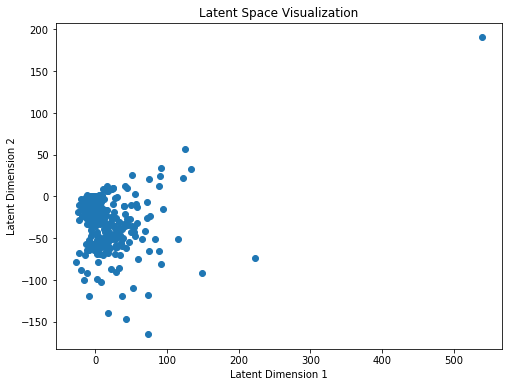

In [121]:
# Define a function to encode data points into the latent space
def encode_data(data_loader, model, device):
    latents = []
    labels = []

    model.eval()
    with torch.no_grad():
        for batch_data in data_loader:
            batch_data = batch_data[0].to(device)
            _, mu, _ = model(batch_data)
            latents.append(mu.cpu().numpy())
    
    return np.concatenate(latents, axis=0)

# Encode the data into the latent space
encoded_data = encode_data(dataloader, model, device)

# Plot the latent space
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.title('Latent Space Visualization')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

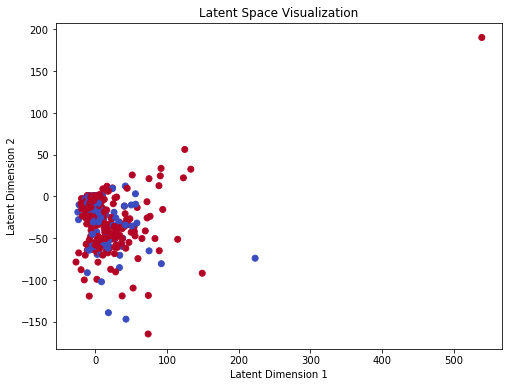

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to encode data points into the latent space
def encode_data(data_loader, model, device):
    latents = []
    labels = []

    model.eval()
    with torch.no_grad():
        for batch_data in data_loader:
            batch_data = batch_data[0].to(device)
            _, mu, _ = model(batch_data)
            latents.append(mu.cpu().numpy())
    
    return np.concatenate(latents, axis=0)

# Encode the data into the latent space
encoded_data = encode_data(dataloader, model, device)

# Get the "GASTROINTEST_DISORD" values
gastrointest_disord = result_df['GASTROINTEST_DISORD']

# Create a scatter plot with different colors based on "GASTROINTEST_DISORD"
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=gastrointest_disord, cmap='coolwarm')
plt.title('Latent Space Visualization')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()
